<a href="https://colab.research.google.com/github/Aboelsaood23/Aboelsaood23/blob/main/specilaization_2_Course_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Neural Network Course-week 1 and 2

In [ ]:
import math
import numpy as np
def basic_sigmoid(x):
  z =1/(1+math.exp(-x))
  return z

def array_sigmoid(x):
  z =1/(1+np.exp(-x))
  return z

In [ ]:
z =basic_sigmoid(10)
print(z)
y=array_sigmoid(10)
print(y)

# if inputs are real number both of them work, if the input is array the
#basic one gives an error
x =np.array([1,2,3])
print(x)
#basic_sigmoid_output =basic_sigmoid(x)
#print(basic_sigmoid_output)
array_sigmoid_output=array_sigmoid(x)
print(array_sigmoid_output)

0.9999546021312976
0.9999546021312976
[1 2 3]
[0.73105858 0.88079708 0.95257413]


In [ ]:
#dervative of sigmoid function z=(1/(1+E^x)) is z(1-z) where z is the sigmoid
def array_sigmoid_derivative(x):
  z= array_sigmoid(x)
  dz=z*(1-z)
  return dz

In [ ]:
x =np.array([1,2,3])
z =array_sigmoid_derivative(x)
print(z)

[0.19661193 0.10499359 0.04517666]


In [ ]:
#create function that takes input image with shape(a,b,c) and convert it to(a*b*,1)
def image2vector(x):
  z =x.reshape(x.shape[0]*x.shape[1]*x.shape[2],1)
  return z


In [ ]:
x =np.random.rand(240,240,3)
z =image2vector(x)
z.shape

(172800, 1)

In [ ]:
#normalization of data leads to better performance, because gradiant descent
# converges faster after normalization ,
#normalization is deviding each row on the matrix with it's norm if row (0,3,4) norm is 5

def norm_rows(x):
  norm_x =np.linalg.norm(x,axis=1,keepdims=True)
  x_normalized=x/norm_x
  return x_normalized

In [ ]:
x =np.array([[0,3,4],
             [1,6,4]])
z =norm_rows(x)
z

array([[0.        , 0.6       , 0.8       ],
       [0.13736056, 0.82416338, 0.54944226]])

In [ ]:
# create softmax function
def softmax(x):
  x_exp =np.exp(x)
  x_sum =np.sum(x_exp,axis=1,keepdims=True) # this line of code sum all row numbers
  s =x_exp/x_sum
  return s

In [ ]:
t_x =np.array([[9,2,5,0,0],
              [7,5,0,0,0]])

print("softmax",softmax(t_x))


softmax [[9.80897665e-01 8.94462891e-04 1.79657674e-02 1.21052389e-04
  1.21052389e-04]
 [8.78679856e-01 1.18916387e-01 8.01252314e-04 8.01252314e-04
  8.01252314e-04]]


In [ ]:
# let's check vectorization, these codes are not vectorized
import time

x1 = [9, 2, 5, 0, 0, 7, 5, 0, 0, 0, 9, 2, 5, 0, 0]
x2 = [9, 2, 2, 9, 0, 9, 2, 5, 0, 0, 9, 2, 5, 0, 0]

#DOT PRODUCT PROCESS
tic =time.process_time()
dot =0
for i in range(len(x1)):
  dot += x1[i]*x2[i]
toc =time.process_time()
print("dot ="+str(dot)+"\n computation time = " + str(1000*(toc-tic))+ "ms")

#OUTER PRODUCT
outer =np.zeros((len(x1),len(x2)))
tic_out_product =time.process_time()
for i in range(len(x1)):
  for j in range(len(x2)):
    outer[i,j]=x1[i]*x2[j]
toc_out_product =time.process_time()
print("outer = "+str(outer)+"\n --- computational time = "+ str(1000*(toc_out_product-tic_out_product))+" in ms ")

#element wise product
element_wise =np.zeros((len(x1)))
tic_element_wise =time.process_time()

for i in range(len(x1)):
  element_wise[i]=x1[i]*x2[i]
toc_element_wise=time.process_time()

print("element_wise"+str(element_wise)+"----\n computational time" +str(1000*(toc_element_wise-tic_element_wise))+" in ms ")

#general product
w =np.random.rand(3,len(x1))
tic_general_dot =time.process_time()
general_dot=np.zeros((w.shape[0]))
for i in range(w.shape[0]):
  for j in range(len(x1)):
    general_dot[i] +=w[i,j]*x1[j]
toc_general_dot =time.process_time()
print("general_dot"+str(general_dot) +"\n computational time = " +str(1000*(toc_general_dot - tic_general_dot)) +" in ms")

dot =278
 computation time = 0.4714049999998693ms
outer = [[81. 18. 18. 81.  0. 81. 18. 45.  0.  0. 81. 18. 45.  0.  0.]
 [18.  4.  4. 18.  0. 18.  4. 10.  0.  0. 18.  4. 10.  0.  0.]
 [45. 10. 10. 45.  0. 45. 10. 25.  0.  0. 45. 10. 25.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [63. 14. 14. 63.  0. 63. 14. 35.  0.  0. 63. 14. 35.  0.  0.]
 [45. 10. 10. 45.  0. 45. 10. 25.  0.  0. 45. 10. 25.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [81. 18. 18. 81.  0. 81. 18. 45.  0.  0. 81. 18. 45.  0.  0.]
 [18.  4.  4. 18.  0. 18.  4. 10.  0.  0. 18.  4. 10.  0.  0.]
 [45. 10. 10. 45.  0. 45. 10. 25.  0.  0. 45. 10. 25.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

In [ ]:
import time
import numpy as np
x1 = [9, 2, 5, 0, 0, 7, 5, 0, 0, 0, 9, 2, 5, 0, 0]
x2 = [9, 2, 2, 9, 0, 9, 2, 5, 0, 0, 9, 2, 5, 0, 0]

# let's do dot product
tic_dot =time.process_time()
dot =np.dot(x1,x2)
toc_dot =time.process_time()
print(str(dot) +"\n"+str(1000*(toc_dot-tic_dot))+" in ms")

#let's do out product
tic_out_product =time.process_time()
out_product=np.outer(x1,x2)
toc_out_product =time.process_time()
print(str(out_product)+"\n"+str(1000*(toc_out_product-tic_out_product))+" in ms ")

#let's do element wise multiplication
tic_element_wise =time.process_time()
element_wise =np.multiply(x1,x2)
toc_element_wise =time.process_time()
print(str(element_wise)+"\n"+str(1000*(toc_element_wise -tic_element_wise))+" in ms")

278
0.14138899999993626 in ms
[[81 18 18 81  0 81 18 45  0  0 81 18 45  0  0]
 [18  4  4 18  0 18  4 10  0  0 18  4 10  0  0]
 [45 10 10 45  0 45 10 25  0  0 45 10 25  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [63 14 14 63  0 63 14 35  0  0 63 14 35  0  0]
 [45 10 10 45  0 45 10 25  0  0 45 10 25  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [81 18 18 81  0 81 18 45  0  0 81 18 45  0  0]
 [18  4  4 18  0 18  4 10  0  0 18  4 10  0  0]
 [45 10 10 45  0 45 10 25  0  0 45 10 25  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]
0.22980799999983148 in ms 
[81  4 10  0  0 63 10  0  0  0 81  4 25  0  0]
0.1881980000000283 in ms


In [ ]:
# l1 loss function
def l1_loss(yhat,y):
  loss =np.sum(np.abs(yhat-y))
  return loss


yhat = np.array([.9, 0.2, 0.1, .4, .9])
y = np.array([1, 0, 0, 1, 1])
l1_loss(yhat,y)

1.1

In [ ]:
#l2 loss

def l2_loss(yhat,y):
  loss =np.dot((yhat-y),(yhat-y))
  return loss
yhat = np.sum(np.array([.9, 0.2, 0.1, .4, .9]))
y = np.array([1, 0, 0, 1, 1])

l2_loss(yhat,y)

19.25

In [ ]:
#logistic regression using neural networks
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import zipfile
zip_ref =zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/data/Andrew NJ Courses /Neural_Network/trian and test_nural_week_2.zip","r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
#load the data
import h5py
import numpy as np
train_dataset = h5py.File('/content/Files/train_catvnoncat.h5', "r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

test_dataset = h5py.File('/content/Files/test_catvnoncat.h5', "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

classes = np.array(test_dataset["list_classes"][:]) # the list of classes

train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

if not cat then 0 if cat then 1  [1]
b'cat'


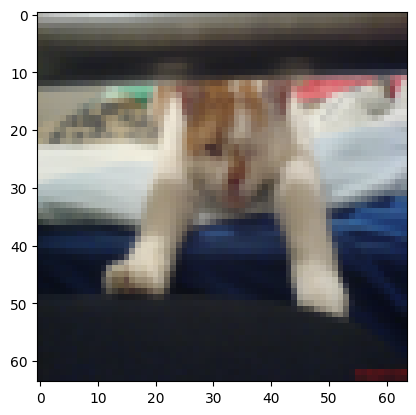

In [ ]:
import matplotlib.pyplot as plt
train_set_x_orig.shape
image_example =29
plt.imshow(train_set_x_orig[image_example])
print("if not cat then 0 if cat then 1 ",train_set_y_orig[:,image_example])  # check dimension of x and y
print(classes[np.squeeze(train_set_y_orig[:, image_example])])

In [ ]:
print(train_set_x_orig.shape)
print(train_set_y_orig.shape)
print(test_set_x_orig.shape)
print(test_set_y_orig.shape)
print(classes.shape)

(209, 64, 64, 3)
(1, 209)
(50, 64, 64, 3)
(1, 50)
(2,)


In [ ]:
train_set_x_flatten =train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
#it's same like this one
my_flatten =train_set_x_orig.reshape(train_set_x_orig.shape[1]*train_set_x_orig.shape[2]*
                             train_set_x_orig.shape[3],train_set_x_orig.shape[0])
test_set_x_flatten=test_set_x_orig.reshape(test_set_x_orig.shape[1]*test_set_x_orig.shape[2]*
                                           test_set_x_orig.shape[3],test_set_x_orig.shape[0])
train_set_x_flatten.shape,my_flatten.shape,test_set_x_flatten.shape,train_set_y_orig.shape,test_set_y_orig.shape


((12288, 209), (12288, 209), (12288, 50), (1, 209), (1, 50))

In [ ]:
#on real data sets standrizing the data is substract the mean of the whole numpy array then deviding by standard deviation
#but for picturind data set it's almost the same to onlt devide every row on 255,check the reason
# if you tried both ways you will get different results , which one is better depends on the alogorithms
x =train_set_x_flatten/255
mean = np.mean(train_set_x_flatten)
standard_deviation =np.std(train_set_x_flatten)
x2 =(train_set_x_flatten-mean)/standard_deviation


In [ ]:
train_set_x =train_set_x_flatten /255.
test_set_x =test_set_x_flatten /255.

In [ ]:
#Build logistice Regression using neuraL networks
# define sigmoid function
def sigmoid(x):
  out =1/(1+np.exp(-x))
  return out

#intialize parameters
def intialize_parameters(dim):
  w =np.zeros((dim,1)) # to get array with (dim,1) use it on w.Tx+b
  b =0
  return w,b

def propagate(w,b,x,y):
  #xwe need it here to be (###,num_examples)
  m =x.shape[1]
  A = sigmoid(np.dot(w.T,x)+b)
  print("type of output of sigmoid"+str(type(A))+"\n"+"shape of ouput of sigmoid function is "+str(A.shape))
  print("shape of output of sigmoid should be equal shape of y which is ",(y.shape))
  cost  =-1/m*np.sum(y*np.log(A)+(1-y)*np.log(1-A))
  print("type of cost"+str(type(cost)))
  dw =np.dot(x,(A-y).T)/m
  print("shape of w is ",w.shape)
  print("shape of dw is "+str(dw.shape)+"it should be same as shape of w which is"+str(w.shape))
  print("summution of w shuold be zero (just here but on optimize function it has a value) and it's = "+str(np.sum(w))+" and summution of dw shouldn't be zero and it's ="+str(np.sum(dw)))
  db =np.sum(A-y)/m
  cost=np.squeeze(np.array(cost))
  print("new type of cost",type(cost))
  print("value of cost",cost)
  print("shap of cost",cost.shape)
  grads ={
      "dw":dw,
      "db":db
  }
  return grads,cost



In [ ]:
import copy
def optimize(w,b,x,y,num_iteration =5,learning_rate=0.009):
  print("optimize function parameters")
  print("shape of x ",x.shape)
  print("shape of y",y.shape)
  print('shape of w',w.shape)
  w =copy.deepcopy(w)
  b =copy.deepcopy(b)
  costs=[]
  for i in range(num_iteration):
    grads,cost =propagate(w,b,x,y)
    print("--------------------- number of iterations __________",i)
    #the goal here is that every iteration w and b changes and dw,db but x and y are the same, doesn't matter the full result what matters is the itera
    dw =grads['dw']
    db=grads['db']
    w = w - (learning_rate*dw)
    b = b - (learning_rate*db)
    print(w)
    print(b)
    if i % 100 == 0:
      costs.append(cost)
      print("costs after 100 iteration",costs)

  params = {"w": w,
            "b": b}

  grads = {"dw": dw,
           "db": db}

  return params, grads, costs


In [ ]:
def predict(w,b,x):
  m =x.shape[1]
  y_predict =np.zeros((1,m))
  w=w.reshape(x.shape[0],1) # i think this one is to make sure that shape of w i correct for next implementation steps
  A=sigmoid(np.dot(w.T,x)+b)
  print("shape of of A is same as y")
  for i in range(A.shape[1]):
    if(A[0,i]>0.5):
      y_predict[0,i] =1
    else:
      y_predict[0,i] =0
  return y_predict

In [ ]:
# buid it all on a emodel
def model(x_train,y_train,x_test,y_test,num_iteration=2000,learning_rate=0.5):
  w,b =intialize_parameters(dim=x_train.shape[0])
  parameters, grads, costs = optimize(w,b,x_train, y_train,num_iteration,learning_rate)
  w = parameters["w"]
  b = parameters["b"]
  y_prediction_test = predict(w, b, x_test)
  y_prediction_train = predict(w, b, x_train)
  d = {"costs": costs,
         "Y_prediction_test": y_prediction_test,
         "Y_prediction_train" : y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iteration}
  return d


In [ ]:
x_train =train_set_x
y_train =train_set_y_orig
x_test  =test_set_x
y_test  =test_set_y_orig
d =model(x_train,y_train,x_test,y_test,num_iteration=2000,learning_rate=0.005)

Streaming output truncated to the last 5000 lines.
shape of ouput of sigmoid function is (1, 209)
shape of output of sigmoid should be equal shape of y which is  (1, 209)
type of cost<class 'numpy.float64'>
shape of w is  (12288, 1)
shape of dw is (12288, 1)it should be same as shape of w which is(12288, 1)
summution of w shuold be zero (just here but on optimize function it has a value) and it's = 0.6058679231372306 and summution of dw shouldn't be zero and it's =-0.033846422003638243
new type of cost <class 'numpy.ndarray'>
value of cost 0.150344601540023
shap of cost ()
--------------------- number of iterations __________ 1737
[[ 0.00909334]
 [-0.02470665]
 [-0.01145958]
 ...
 [-0.01087501]
 [-0.02795398]
 [ 0.02192045]]
-0.016123768766600904
type of output of sigmoid<class 'numpy.ndarray'>
shape of ouput of sigmoid function is (1, 209)
shape of output of sigmoid should be equal shape of y which is  (1, 209)
type of cost<class 'numpy.float64'>
shape of w is  (12288, 1)
shape of dw 

In [ ]:
costs = d['costs']
costs

############## this means logistic regression is done

[array(0.69314718),
 array(0.58450836),
 array(0.46694904),
 array(0.37600687),
 array(0.33146329),
 array(0.30327307),
 array(0.27987959),
 array(0.26004214),
 array(0.24294068),
 array(0.22800422),
 array(0.21481951),
 array(0.20307819),
 array(0.19254428),
 array(0.18303334),
 array(0.17439859),
 array(0.1665214),
 array(0.15930452),
 array(0.15266732),
 array(0.14654224),
 array(0.14087208)]

In [ ]:
x_train.shape

(12288, 209)

In [ ]:
# to one example
x =x_train[:,20]
y =y_train[:,20]
print(y.shape)
x =x.reshape((1, x.shape[0])).T
y =y.reshape((1, y.shape[0])).T
#x_test,y_test
y.shape

(1,)


(1, 1)

In [ ]:
d =model(x,y,x_test,y_test,num_iteration=2000,learning_rate=0.005)

Streaming output truncated to the last 5000 lines.
shape of ouput of sigmoid function is (1, 1)
shape of output of sigmoid should be equal shape of y which is  (1, 1)
type of cost<class 'numpy.float64'>
shape of w is  (12288, 1)
shape of dw is (12288, 1)it should be same as shape of w which is(12288, 1)
summution of w shuold be zero (just here but on optimize function it has a value) and it's = -18.481399293503145 and summution of dw shouldn't be zero and it's =0.19411836781103592
new type of cost <class 'numpy.ndarray'>
value of cost 3.5758942854256196e-05
shap of cost ()
--------------------- number of iterations __________ 1737
[[-6.67571453e-05]
 [-3.07082868e-04]
 [-2.67028581e-05]
 ...
 [-1.38854862e-03]
 [-1.56211720e-03]
 [-3.73840013e-04]]
-0.00340461440827615
type of output of sigmoid<class 'numpy.ndarray'>
shape of ouput of sigmoid function is (1, 1)
shape of output of sigmoid should be equal shape of y which is  (1, 1)
type of cost<class 'numpy.float64'>
shape of w is  (122

In [ ]:
d.keys()

dict_keys(['costs', 'Y_prediction_test', 'Y_prediction_train', 'w', 'b', 'learning_rate', 'num_iterations'])

In [ ]:
y_predicted =d['Y_prediction_train']
y_predicted,y

(array([[0.]]), array([[0]]))

### Neural Networks- week 3

In [ ]:
import numpy as np
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j

    X = X.T
    Y = Y.T

    return X, Y

In [ ]:
x,y =load_planar_dataset()

In [ ]:
x

array([[ 1.20444229e+00,  1.58709904e-01,  9.52471960e-02,
         3.49178475e-01,  6.94150378e-01,  1.62065038e+00,
         1.53856225e+00,  3.63085641e-02,  4.74591109e-01,
         1.65695828e-01,  1.66446249e+00,  8.40285720e-01,
         2.61695163e-01,  2.31614896e-01,  1.58013020e+00,
         6.35509950e-03,  6.80610419e-01,  1.21400432e-01,
         1.13281261e+00,  1.61505892e+00,  1.66454441e-01,
         1.72438241e+00,  1.88667246e+00,  1.72327227e+00,
         1.54661332e+00,  9.84590400e-01,  1.45313345e+00,
         7.49043388e-01,  1.45048341e+00,  1.64287865e+00,
         1.28141487e+00,  1.59574104e+00,  1.46298294e+00,
         1.46629048e+00,  1.54348961e+00,  1.57013416e+00,
         1.22995404e+00,  1.31142345e+00, -1.99364553e+00,
         3.94564752e-01,  1.51715449e+00,  1.69169139e+00,
         1.74186686e+00, -2.91373382e+00,  7.52150898e-01,
         1.68537303e+00,  3.71160238e-01, -3.73033884e+00,
         3.52484080e-01, -1.48694206e+00, -7.45290416e-0